# Project: Wrangling and Analyze Data

In [3]:
import pandas as pd
import requests
import io
import json
import numpy as np

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
archive_data = pd.read_csv("twitter-archive-enhanced-2.csv")
archive_data.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
pred_data = pd.read_csv(io.BytesIO(r.content),sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [2]:
##################
# I will skip this part because twitter api cannot be used due to my company regulations.
##################

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [6]:
# json into dataframe
tweet_data = pd.DataFrame(columns=["tweet_id","retweet_count","favorite_count"])
with open('tweet-json.txt') as f:
    for line in f:
        st = json.loads(line)
        t_id = st["id_str"]
        r_c = st["retweet_count"]
        f_c = st["favorite_count"]
        tweet_data = tweet_data.append(pd.DataFrame([[t_id,r_c,f_c]],columns=["tweet_id","retweet_count","favorite_count"]))
tweet_data = tweet_data.reset_index(drop=True)
tweet_data.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [42]:
tweet_data.dtypes

tweet_id          object
retweet_count     object
favorite_count    object
dtype: object

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
archive_data.describe()
# ↑ rating numeraor and denominator have 0

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [ ]:
archive_data.info()
# ↑ find null value

In [43]:
print(archive_data.dtypes)
print(tweet_data.dtypes)

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object
tweet_id          object
retweet_count     object
favorite_count    object
dtype: object


In [ ]:
# and find quality issues and tidiness issues to check all data on excel

### Quality issues
1.archive.timestamp has object type. it shold be datetime type 

2.archive.rating_denominator has "0" value

3.archive.name has "None". it should be "no name"

4.archive.in_reply_to_status_id and in_reply_to_user_id are Unnecessary (only 78 rows has its value)

5.archive.retweeted_status_id and retweeted_status_user_id are Unnecessary (only 181 rows has its value)

6.archive.sourse contains link tag 

7.archive.name has "a". it should be "no name" 

8.tweet.retweet_count and favorite_count are object type, there shuld be integer type.

### Tidiness issues
1.archive: Variables as column headers (doggo, flooder, pepper, puppy)

2.archive: rating_numerator and denominator should single column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [7]:
# Make copies of original pieces of data
cp_archive = archive_data.copy() 
cp_pred =  pred_data.copy()
cp_tweet = tweet_data.copy()

### Issue #1: archive.timestamp has object type. it shold be datetime type 

#### Define: convert type object to datetime

#### Code

In [8]:
cp_archive["timestamp"] = pd.to_datetime(cp_archive["timestamp"])

#### Test

In [69]:
cp_archive.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
rating                               float64
dtype: object

### Issue #2:archive.rating_denominator has "0" value
### and tidiness issue #2:archive: rating_numerator and denominator should single column

#### Define : create new column numerator / denominator (if denominator is 0, then new col val is 0)

#### Code

In [9]:
cp_archive["rating"] = cp_archive["rating_numerator"] / cp_archive["rating_denominator"]
print(cp_archive["rating"].describe())
cp_archive["rating"] = cp_archive["rating"].replace(np.inf,0)

count    2356.000000
mean             inf
std              NaN
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max              inf
Name: rating, dtype: float64


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,0.0


#### Test

In [66]:
cp_archive["rating"].describe()

count    2356.000000
mean        1.221513
std         4.082695
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

### Issue #3:archive.name has "None"
### Issue #7:archive.name has "a". it should be "no name" 
#### Define : replace "None" and "a" to "no name"

In [10]:
cp_archive["name"] = cp_archive["name"].replace("None","no name")
cp_archive["name"] = cp_archive["name"].replace("a","no name")

In [11]:
# test
cp_archive["name"].value_counts().head(5)

no name    800
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Name: name, dtype: int64

### Issue #4:archive.in_reply_to_status_id and in_reply_to_user_id are Unnecessary (only 78 rows has its value)
### Issue #5:archive.retweeted_status_id and retweeted_status_user_id are Unnecessary (only 181 rows has its value)
#### Define : drop unnecessary columns

In [12]:
cp_archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id'], inplace=True)

In [80]:
cp_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'rating'],
      dtype='object')

### Issue #6:archive.sourse contains link tag
#### Define : delete tag string

In [13]:
cp_archive["source"] = cp_archive["source"].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">',"")#,['<a href="http://twitter.com/download/iphone" rel="nofollow">',""],['<a href="http://vine.co" rel="nofollow">',""],['<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">',""],["</a>",""])
cp_archive["source"] = cp_archive["source"].str.replace('<a href="http://vine.co" rel="nofollow">',"")
cp_archive["source"] = cp_archive["source"].str.replace('<a href="http://twitter.com" rel="nofollow">',"")
cp_archive["source"] = cp_archive["source"].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">',"")
cp_archive["source"] = cp_archive["source"].str.replace('</a>',"")

In [119]:
cp_archive["source"].dtype

dtype('O')

In [13]:
cp_archive["source"].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #8:tweet.retweet_count and favorite_count are object type, there shuld be integer type.
#### Define : convert type object to integer

In [14]:
cp_tweet.retweet_count = cp_tweet.retweet_count.astype(int)
cp_tweet.favorite_count = cp_tweet.favorite_count.astype(int)

In [49]:
cp_tweet.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

### tidiness Issue #1:archive: Variables as column headers (doggo, flooder, pepper, puppy)
#### Define : Consolidate into single column

In [15]:
cp_archive["dog_stages"] = cp_archive["doggo"] + cp_archive["floofer"] + cp_archive["pupper"] + cp_archive["puppo"]
cp_archive["dog_stages"] = cp_archive["dog_stages"].str.replace("None","")
cp_archive["dog_stages"] = cp_archive["dog_stages"].replace("","-")

In [ ]:
# test
cp_archive["dog_stages"]

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [16]:
cp_archive.to_csv("./twitter_archive_master.csv")
cp_pred.to_csv("./twitter_pred_master.csv")
cp_tweet.to_csv("./twitter_master.csv")

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [16]:
cp_tweet["tweet_id"] = cp_tweet["tweet_id"].astype(int)
df = pd.merge(cp_archive,cp_tweet,on="tweet_id")
df = pd.merge(df,cp_pred,on="tweet_id")
df.to_csv("./df.csv")

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline 
df.dog_stages

0            -
1            -
2            -
3            -
4            -
5            -
6            -
7            -
8            -
9        doggo
10           -
11           -
12       puppo
13           -
14       puppo
15           -
16           -
17           -
18           -
19           -
20           -
21           -
22           -
23           -
24           -
25           -
26           -
27           -
28      pupper
29           -
         ...  
2043         -
2044         -
2045         -
2046         -
2047         -
2048         -
2049         -
2050         -
2051         -
2052         -
2053         -
2054         -
2055         -
2056         -
2057         -
2058         -
2059         -
2060         -
2061         -
2062         -
2063         -
2064         -
2065         -
2066         -
2067         -
2068         -
2069         -
2070         -
2071         -
2072         -
Name: dog_stages, Length: 2073, dtype: object

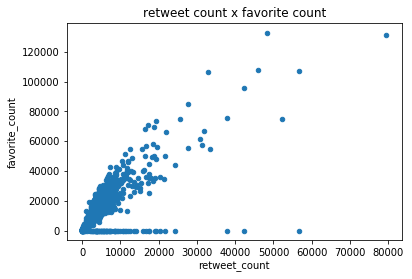

In [42]:
df.plot.scatter(x="retweet_count", y='favorite_count',title='retweet count x favorite count')

In [47]:
df[df["name"]!="no name"]["name"].value_counts().head(5)

Charlie    11
Penny      10
Cooper     10
Oliver     10
Tucker     10
Name: name, dtype: int64

In [56]:
print(df["favorite_count"].max())
print(df["retweet_count"].max())


132810
79515


### Insights:
1.favorite count and retweet count are correlated

2.most popular dog name is "Charlie" 

3.max favorite count is 132810 and max favorite count is 79515

### Visualization

I examined the correlation between rating and favorite

In [ ]:
df[df["rating"]<10].plot.scatter(x="rating", y='favorite_count', title='rating x favorite')